<a href="https://colab.research.google.com/github/szh141/colab/blob/main/CNN_on_sobel_h.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
The simplest CNN, I2K 2020, Juan Nunez-Iglesias, Nicholas Sofroniew

SyntaxError: invalid syntax (<ipython-input-1-4cead64ca8c3>, line 1)

In [2]:
from skimage import data,filters,util
import numpy as np
from matplotlib import pyplot as plt

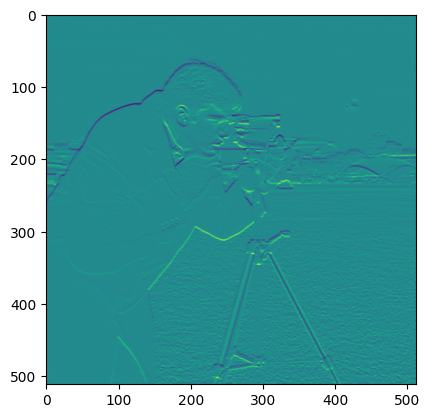

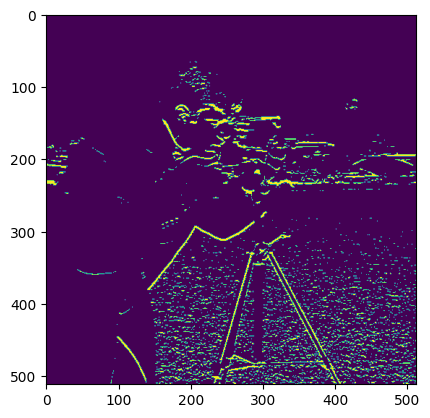

In [74]:
img = data.camera()
img_filtered = filters.sobel_h(img)
plt.imshow(img_filtered)
plt.show()
target = img_filtered>0.07
plt.imshow(target)

Text(0.5, 1.0, 'target')

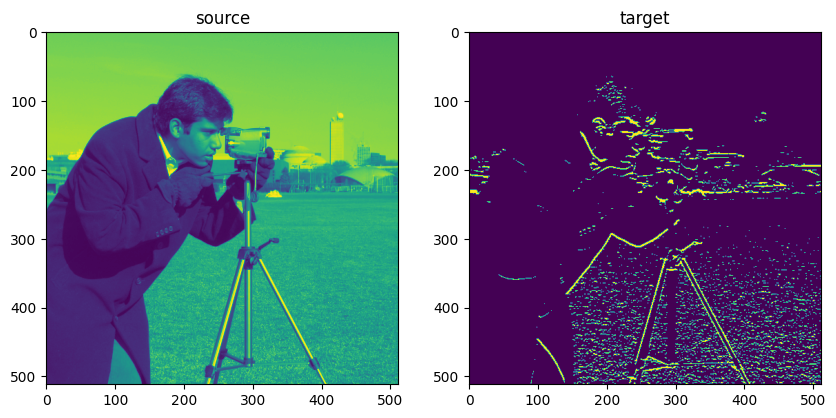

In [4]:
fig,ax = plt.subplots(1,2,figsize=(10,6))
ax[0].imshow(img)
ax[0].set_title('source')
ax[1].imshow(target)
ax[1].set_title('target')

In [ ]:
test_2D = np.arange(25).reshape((5,5))
kernel_view = util.view_as_windows(test_2D,(2,2))
kernel_view # out put 4x4

In [ ]:
a1 = np.arange(4).reshape((2,2))
a2 = a1
print(a1@a2) # @ operator for np.matmul or matrix multiplication
print(a1*a2) # element-wise multiplication
print(np.dot(a1,a2)) # Pearson's coeff, masked non-zero pixel.reshape(-1) for vector dot product

In [ ]:
windowed_img = util.view_as_windows(img,(3,3))
print(img.shape)
print(windowed_img.shape)

In [ ]:
target_cropped = target[1:-1,1:-1]
target_cropped.shape

reshape the windowed_img to 9 feature columns for sklearn training

In [9]:
X = windowed_img.reshape(510*510,3*3)
y = target_cropped.reshape(510*510)

In [10]:
#pip install -U scikit-learn
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver = 'liblinear')
model.fit(X,y)

LogisticRegression(solver='liblinear')

In [11]:
X.shape

(260100, 9)

In [79]:
print(model.coef_.reshape(3,3))
?filters.sobel_h

[[-3.07750871e-01 -6.18724497e-01 -3.08979134e-01]
 [-4.83006140e-04 -6.39488047e-04  3.42671475e-04]
 [ 3.07663913e-01  6.17414743e-01  3.06943022e-01]]


510x510 input entries
3x3 each pixel is one feature, so, a total of 9 features
And those 9 feature's weights are model.coef_
510x510 target is the ground truth
sklearn is fitting for the weights.

In [12]:
kernel = model.coef_.reshape(3,3)
windowed_img_2 = windowed_img.reshape(510,510,1,9)

In [14]:
array2 = np.repeat(kernel[np.newaxis,:,:], repeats=510, axis=0)
array3 = np.repeat(array2[np.newaxis,:,:,:], repeats=510, axis=0)
array3_2 =array3.reshape(510,510,9,1)

In [15]:
a1 = np.arange(9).reshape(3,3)
a2 = np.arange(9)
print(a1)
print(a1*a1)
print(np.dot(a1,a1)) #same as below, @ or np.matmul
print(a1@a1)
print(np.dot(a2,a2)) #same as a1 convolved with a1

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[ 0  1  4]
 [ 9 16 25]
 [36 49 64]]
[[ 15  18  21]
 [ 42  54  66]
 [ 69  90 111]]
[[ 15  18  21]
 [ 42  54  66]
 [ 69  90 111]]
204


(510, 510, 1, 1)


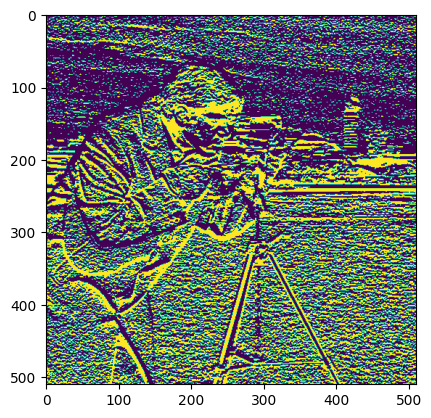

In [75]:
a5 = windowed_img_2@array3_2
print(a5.shape)
a6 = np.zeros((510,510))
for i in range(510):
  for j in range(510):
    a6[i,j] = a5[i,j]

plt.imshow(a6>0.07)

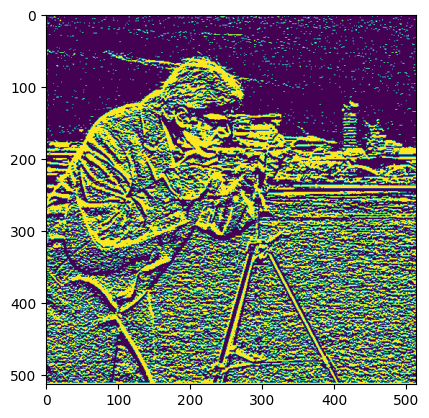

In [69]:
from scipy.signal import convolve
test = convolve(img,kernel)
plt.imshow(test>0.07)

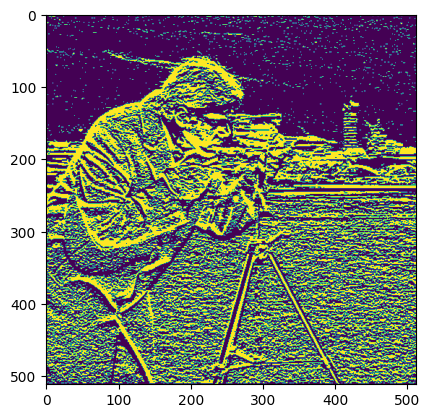

In [61]:
kernel_pad = np.pad(kernel, (255,254), 'constant') #FFT multiplication needs two images of the same dimension
kernel_pad_shift = np.fft.fftshift(kernel_pad)
img_convolved = np.fft.ifft2(np.fft.fft2(img) * np.fft.fft2(kernel_pad_shift)).real
plt.imshow(img_convolved>0.07)
# TINA convolution using FFT
# https://github.com/True-North-Intelligent-Algorithms/tnia-python/blob/030d08b426678cbf23b53276b2e515399fed9f38/notebooks/imagesc/2024_01_16_fft_vs_fft2/fft_shift.ipynb

Text(0.5, 1.0, 'target')

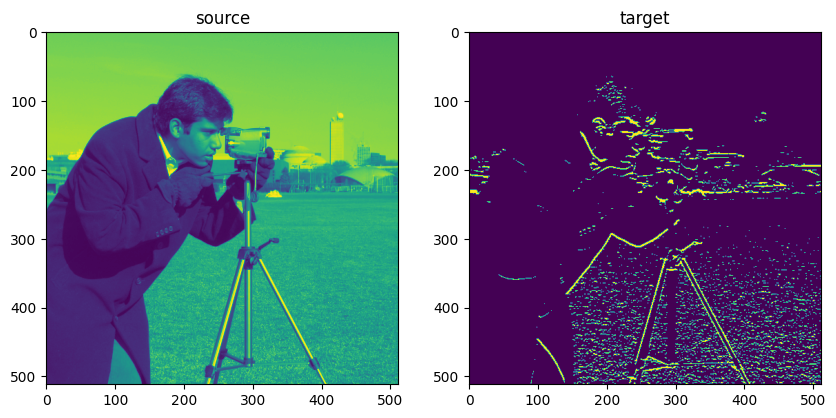

In [59]:
fig,ax = plt.subplots(1,2,figsize=(10,6))
ax[0].imshow(img)
ax[0].set_title('source')
ax[1].imshow(target)
ax[1].set_title('target')